In [10]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

def show_PIL_image(image):
    if(len(image.shape) < 3):
        image = image.unsqueeze(0)
    print(image)
    image = ToPILImage()(image.float())
    plt.imshow(image)
    plt.axis(False)
    plt.show()

<class 'torch.Tensor'>
tensor([[[-0.4739,  0.7933,  1.6324,  ...,  1.4954,  0.6734,  0.1083],
         [-0.3712,  0.8447,  1.6667,  ...,  1.3584,  0.5878,  0.1083],
         [-0.4911,  0.8447,  1.5297,  ...,  1.2899,  0.5707,  0.0398],
         ...,
         [ 0.5364,  0.3823, -0.1143,  ..., -0.6623, -1.2274, -1.6042],
         [ 0.4166,  0.6392,  0.2624,  ..., -1.2274, -1.6213, -1.7583],
         [-0.1486,  0.0741,  0.8104,  ..., -1.6213, -1.7412, -1.6042]],

        [[-1.3354, -0.1625,  0.6254,  ...,  1.8158,  0.8880,  0.1176],
         [-1.2654, -0.1450,  0.6254,  ...,  1.6933,  0.8179,  0.1176],
         [-1.4230, -0.1625,  0.4678,  ...,  1.6408,  0.8179,  0.0826],
         ...,
         [ 0.6254,  0.5028,  0.0126,  ..., -0.6352, -1.2129, -1.6155],
         [ 0.5028,  0.7654,  0.4153,  ..., -1.2304, -1.6506, -1.8081],
         [-0.0749,  0.2052,  0.9755,  ..., -1.6331, -1.8081, -1.6856]],

        [[-1.6127, -0.4973,  0.2696,  ...,  1.9254,  1.0191,  0.2871],
         [-1.4907, -0.

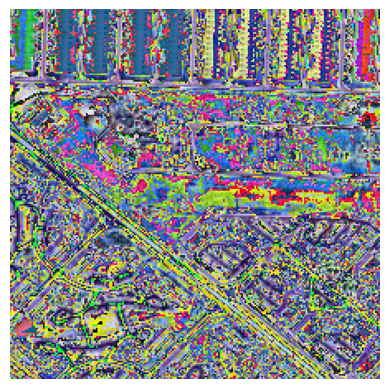

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])


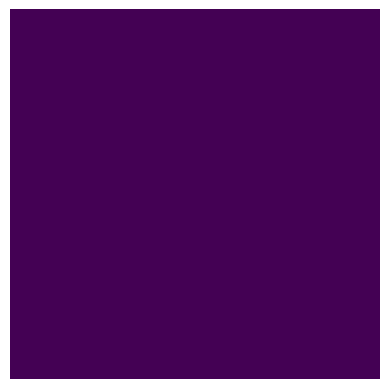

In [11]:
from Modules.ultis import DubaiAerialread
import albumentations as A
from torchvision import transforms
from albumentations.pytorch import ToTensorV2

trans = transforms.ToTensor()

transforms_img = A.Compose([
    # A.RandomResizedCrop(256, 256),  # Random crop and resize
    A.HorizontalFlip(),  # Random horizontal flip
    A.VerticalFlip(),  # Random vertical flip
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
    # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),  # Convert to tensor
])

transforms_mask = transforms.Compose([
    transforms.RandomResizedCrop(size=(256, 256)),  # Random crop and resize
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.ToTensor(),  # Convert to tensor
])

dataset = DubaiAerialread(data_path='data/Semantic segmentation dataset', transform=None)

image, mask = dataset[10]
print(type(mask))
show_PIL_image(image)
show_PIL_image(mask)